#### RowNumber、CustomerId is the primary key
#### Surname is the last name of the customer
#### CreditScore is Credit score of the customer. Higher credit score means better banking behaviors
#### Geography means 郵遞區號 
#### Gender、Age as seen
#### Tenure：不動產數量
#### Balance：帳戶內金額
#### Has credit car as seen.
#### Is Active member as seen
#### EstimatedSalary as seen
#### Exit：The target featrue.

Row:8000
Col:13

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv('train.csv')
train_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


In [7]:
train_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5001.026625,1.569089e+07,630.804875,42.988125,4.567375,100569.286116,1.534250,0.702750,0.516875,100103.554906,0.204000
std,2879.566761,7.187306e+04,59.076984,7.515870,1.272758,31431.771836,0.582554,0.457076,0.499746,24511.460933,0.402994
min,1.000000,1.556571e+07,446.000000,28.000000,2.000000,62397.410000,1.000000,0.000000,0.000000,57522.070000,0.000000
25%,2500.750000,1.562882e+07,590.000000,38.000000,4.000000,62397.410000,1.000000,0.000000,0.000000,79216.925000,0.000000
50%,5014.000000,1.569017e+07,631.000000,42.000000,5.000000,111118.600000,1.000000,1.000000,1.000000,100056.110000,0.000000
75%,7474.250000,1.575398e+07,672.000000,47.000000,6.000000,126500.100000,2.000000,1.000000,1.000000,121104.542500,0.000000
max,9999.000000,1.581569e+07,753.000000,81.000000,7.000000,188500.680000,4.000000,1.000000,1.000000,142481.990000,1.000000


In [8]:
import seaborn
data = train_data.copy()
exited = data[data.Exited==1]
not_exited = data[data.Exited==0]
corr_matrix  = data.corr()
corr_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.009613,0.013601,0.016569,0.007163,0.005026,-0.006705,0.003179,0.003316,0.027600,0.004003
CustomerId,0.009613,1.000000,0.000929,-0.006874,0.002657,-0.003853,0.003545,0.003356,-0.006845,-0.000375,-0.001401
CreditScore,0.013601,0.000929,1.000000,0.002744,0.002374,0.001024,0.008050,-0.013454,0.026846,-0.004503,-0.024877
Age,0.016569,-0.006874,0.002744,1.000000,-0.005595,0.036458,-0.028103,-0.009543,0.096660,-0.004913,0.284937
Tenure,0.007163,0.002657,0.002374,-0.005595,1.000000,-0.013555,0.007594,0.024330,-0.019281,0.001388,-0.015832
Balance,0.005026,-0.003853,0.001024,0.036458,-0.013555,1.000000,-0.299640,-0.014920,-0.015470,0.021139,0.120387
NumOfProducts,-0.006705,0.003545,0.008050,-0.028103,0.007594,-0.299640,1.000000,0.000679,0.010682,0.008099,-0.048936
HasCrCard,0.003179,0.003356,-0.013454,-0.009543,0.024330,-0.014920,0.000679,1.000000,-0.007592,-0.020165,-0.006711
IsActiveMember,0.003316,-0.006845,0.026846,0.096660,-0.019281,-0.015470,0.010682,-0.007592,1.000000,-0.011354,-0.158626
EstimatedSalary,0.027600,-0.000375,-0.004503,-0.004913,0.001388,0.021139,0.008099,-0.020165,-0.011354,1.000000,0.007740


In [9]:
data = train_data.copy()
cols_to_drop = data.columns[[0,1,2]]
data = data.drop(columns=cols_to_drop)
categorical_feature = data.columns[[1,2]]
dummy = pd.get_dummies(data[categorical_feature])
data = data.merge(dummy , on = data.index)
data = data.drop(columns=data.columns[[0,2,3]])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,720,38,5,114051.97,2,0,1,107577.29,0,0,0,1,0,1
1,682,54,4,62397.41,1,1,0,113088.60,1,1,0,0,1,0
2,672,31,5,119903.67,1,1,1,132925.17,0,1,0,0,1,0
3,592,40,4,104257.86,1,1,0,110857.33,0,0,0,1,1,0
4,753,42,5,120387.73,1,0,1,126378.57,0,0,0,1,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x23efc8a5790>,
 'caps': [<matplotlib.lines.Line2D at 0x23efc8a5e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23efc8a5430>,
 'medians': [<matplotlib.lines.Line2D at 0x23efc8ba550>,
 'fliers': [<matplotlib.lines.Line2D at 0x23efc8ba8b0>,
 'means': []}

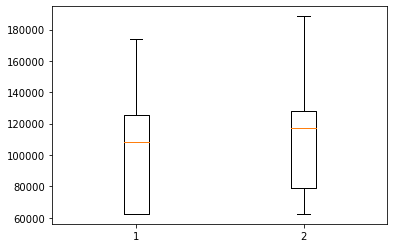

In [10]:
data_0 = data[data.Exited==0]
data_1 = data[data.Exited==1]
plt.boxplot([data_0.Balance , data_1.Balance])

In [11]:
#data = data[data.Balance!=62397.41]
#data.Balance[data.Balance==62397.41] = np.nan
data = data.drop(columns='Balance')
data

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,720,38,5,2,0,1,107577.29,0,0,0,1,0,1
1,682,54,4,1,1,0,113088.60,1,1,0,0,1,0
2,672,31,5,1,1,1,132925.17,0,1,0,0,1,0
3,592,40,4,1,1,0,110857.33,0,0,0,1,1,0
4,753,42,5,1,0,1,126378.57,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,568,35,6,2,1,1,124890.50,1,1,0,0,1,0
7996,602,45,7,1,1,0,99276.02,0,0,1,0,1,0
7997,679,43,5,1,1,0,130780.85,1,0,0,1,1,0
7998,715,38,4,1,0,0,95484.52,0,1,0,0,0,1


In [12]:
x = data.drop(columns = 'Exited')
y = data['Exited']

In [13]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators = 1000)
# rf.fit(x,y)
# importance = rf.feature_importances_
# importance_index = np.argsort(importance)[::-1]
# importances = {}
# for i , col in enumerate(x.columns):
#   importances[col] = importance[i]
# importance = pd.Series(importances)
# sorted = importance.sort_values()[::-1]
# sorted_cols = sorted.keys()
sorted_cols = ['Age', 'EstimatedSalary', 'CreditScore', 'NumOfProducts', 'Tenure',
       'IsActiveMember', 'HasCrCard', 'Geography_Germany', 'Geography_France',
       'Geography_Spain', 'Gender_Female', 'Gender_Male']
# print(sorted_cols)

In [46]:
from sklearn.model_selection import cross_validate , GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
models = [LGBMClassifier(class_weight = {1:1,0:2} , metric = 'binary_logloss' , colsample_bytree = 0.8 , reg_alpha = 0.01 , max_depth = 2 , min_child_samples = 6 , objective = 'binary')]

In [48]:
from sklearn.model_selection import cross_validate , GridSearchCV
all_scores = {}
for level in np.arange(0.1,5,0.1):
    clf = model
    scores = cross_validate(clf, x[sorted_cols[:10]], y, cv=5 , scoring={'acc':'accuracy' , 'pre':'precision' , 'f1':'f1'})
    df = pd.DataFrame(scores)
    score = df[['test_acc' , 'test_pre' , 'test_f1']].mean().mean()
    all_scores[level] = score
    print(level , score)

0.1 0.6218216295470106
0.2 0.6218216295470106
0.30000000000000004 0.6218216295470106
0.4 0.6218216295470106
0.5 0.6218216295470106
0.6 0.6218216295470106
0.7000000000000001 0.6218216295470106
0.8 0.6218216295470106
0.9 0.6218216295470106
1.0 0.6218216295470106
1.1 0.6218216295470106
1.2000000000000002 0.6218216295470106
1.3000000000000003 0.6218216295470106
1.4000000000000001 0.6218216295470106
1.5000000000000002 0.6218216295470106
1.6 0.6218216295470106
1.7000000000000002 0.6218216295470106
1.8000000000000003 0.6218216295470106
1.9000000000000001 0.6218216295470106
2.0 0.6218216295470106
2.1 0.6218216295470106
2.2 0.6218216295470106


KeyboardInterrupt: 

In [44]:
all_scores = pd.Series(all_scores)
all_scores.sort_values()

0.1    0.539033
0.2    0.612608
0.3    0.650638
0.4    0.672283
0.5    0.687491
0.6    0.693627
0.7    0.701006
0.9    0.705138
4.7    0.708066
4.8    0.708808
0.8    0.708849
4.5    0.709349
1.1    0.710509
4.9    0.711461
4.3    0.711907
4.4    0.712552
1.2    0.712653
2.6    0.712896
4.6    0.713208
1.3    0.714892
1.0    0.715133
3.8    0.715322
3.4    0.715473
4.1    0.716313
3.5    0.716393
2.8    0.716500
1.5    0.716979
3.0    0.717269
4.2    0.717341
2.5    0.717434
3.2    0.717664
3.6    0.717795
3.9    0.717878
1.6    0.718329
1.9    0.718357
4.0    0.718878
3.7    0.719134
2.2    0.719376
2.7    0.719427
3.3    0.719635
2.4    0.719800
1.4    0.720046
2.9    0.720353
1.7    0.720433
2.0    0.720492
1.8    0.720881
3.1    0.721023
2.1    0.721102
2.3    0.721752
dtype: float64

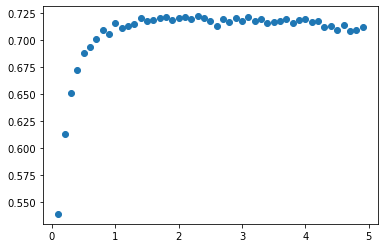

In [45]:
plt.scatter(all_scores.index , all_scores)

In [91]:
x_train = x[sorted_cols[:11]]
y_train = y

In [75]:
# weight = []
# for i in y_train:
#     if i==1:
#         weight.append(3)
#     else:
#         weight.append(1)

In [92]:
def accuracy(pre , ans):
  return((pre==ans).mean())
def precision(pre , ans):
  tp = 0
  fp = 0
  ans = list(ans)
  for i , p in enumerate(pre):
    if p==1:
      if ans[i]==1:
        tp+=1
      else:
        fp+=1
  return(tp/(tp+fp)) 
def recall(pre ,ans):
  tp = 0
  fn = 0
  ans = list(ans)
  for i , a in enumerate(ans):
    if a==1:
      if pre[i]==1:
        tp+=1
      else:
        fn+=1
  return(tp/(tp+fn))
def f1_score(pre , rec):
  return(2*pre*rec/(pre+rec))
def final(accuracy , precision , f1_score):
  return((accuracy+precision+f1_score)/3)

In [105]:
p = 8
p = len(sorted_cols)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier()
#clf = XGBClassifier()
clf = LGBMClassifier(metric = 'binary_logloss' , colsample_bytree = 0.8 , reg_alpha = 0.01 , max_depth = 2 , min_child_samples = 6 , objective = 'binary')
clf.fit(x_train , y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=2, metric='binary_logloss',
               min_child_samples=6, objective='binary', reg_alpha=0.01)

In [79]:
acc = accuracy(pred , y_test)
prec = precision(pred , y_test)
rec = recall(pred , y_test)
f1 = f1_score(prec , rec)
fin = final(acc , prec , f1)
print('------------------------')
print('acc:',acc , 'prec:',prec , 'rec:',rec , 'f1:',f1 , 'final:',fin)

------------------------
acc: 0.8575 prec: 0.784688995215311 rec: 0.47262247838616717 f1: 0.5899280575539568 final: 0.7440390175897559


In [106]:
    data_test = pd.read_csv('test.csv')
    data_test.head()
    test = data_test.copy()
    test = test.drop(columns = cols_to_drop)
    dummy = pd.get_dummies(test[categorical_feature])
    test = test.merge(dummy , on = test.index)
    test = test.drop(columns=test.columns[[0,2,3]])
    test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,726,39,3,62397.41,1,0,0,106139.31,1,0,0,1,0
1,661,42,3,130339.64,1,1,0,125776.38,1,0,0,0,1
2,545,34,6,62397.41,2,1,1,78372.28,1,0,0,0,1
3,731,42,3,86717.08,1,1,0,136026.27,0,0,1,1,0
4,533,50,6,62397.41,1,1,1,135205.58,1,0,0,1,0


In [107]:
x_test = test[sorted_cols[:11]]
x_test.head()

,Age,EstimatedSalary,CreditScore,NumOfProducts,Tenure,IsActiveMember,HasCrCard,Geography_Germany,Geography_France,Geography_Spain,Gender_Female
0,39,106139.31,726,1,3,0,0,0,1,0,1
1,42,125776.38,661,1,3,0,1,0,1,0,0
2,34,78372.28,545,2,6,1,1,0,1,0,0
3,42,136026.27,731,1,3,0,1,0,0,1,1
4,50,135205.58,533,1,6,1,1,0,1,0,1


In [97]:
prediction = clf.predict(x_test)

In [104]:
ans = pd.DataFrame({'RowNumber':data_test.RowNumber , 'Exited':prediction})
ans.to_csv('upload_.csv')